In [16]:
import pandas as pd
import numpy as np 
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
households_by_race = pd.read_excel("Covid_households_by_race.xlsx")

In [40]:
households_by_race.head(34)

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All races,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,26105.0,24040.0,2065.0,NaN,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,NaN,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,NaN,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,NaN,11008.0,8880.0,2128.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022,20645.0,19075.0,1569.0,NaN,6855.0,5260.0,1596.0


In [ ]:
# r = Revised based on population from the most recent decennial census
# y = Estimates produced using PEPAR1 and PEPAR2, the new gender neutral parent pointer variables introduced in 2019. 
# Also, starting in 2019, two parent married and unmarried families include same sex parents.
# a = Householder whose race was reported as only one race.

In [41]:
households_by_race.columns

Index(['Year', 'Total Two parent families', 'Married', 'Unmarried',
       'Unnamed: 4', 'Total One parent families', 'Mother only',
       'Father only'],
      dtype='object')

In [42]:
households_by_race["Year"].unique()

array([nan, 'All races', 2022, 2021, 2020, 2019, 'White', 'Black',
       'Hispanic origin'], dtype=object)

In [43]:
households_by_race["Total Two parent families"].unique()

array([   nan, 26105., 25953., 26161., 26373., 20645., 20503., 20712.,
       21004.,  2289.,  2269.,  2263.,  2211.,  5544.,  5510.,  5401.])

In [44]:
households_by_race["Total One parent families"].unique()

array([   nan, 10889., 11091., 10720., 11008.,  6855.,  7051.,  6901.,
        7116.,  3083.,  3115.,  2976.,  2960.,  2672.,  2727.,  2673.,
        2770.])

In [45]:
allraces = households_by_race[1:7]

In [46]:
allraces

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
1,All races,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,26105.0,24040.0,2065.0,NaN,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,NaN,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,NaN,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,NaN,11008.0,8880.0,2128.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
whiteDf = households_by_race[7:14]

In [125]:
whiteDf

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022,20645.0,19075.0,1569.0,NaN,6855.0,5260.0,1596.0
10,2021,20503.0,19060.0,1443.0,NaN,7051.0,5381.0,1670.0
11,2020,20712.0,19425.0,1287.0,NaN,6901.0,5341.0,1560.0
12,2019,21004.0,19589.0,1415.0,NaN,7116.0,5544.0,1572.0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
blackDf = households_by_race[13:20]

In [156]:
blackDf

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2022,2289.0,1952.0,337.0,NaN,3083.0,2661.0,422.0
17,2021,2269.0,1963.0,305.0,NaN,3115.0,2693.0,422.0
18,2020,2263.0,2023.0,239.0,NaN,2976.0,2622.0,354.0
19,2019,2211.0,1934.0,277.0,NaN,2960.0,2581.0,379.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
hispanicDf = households_by_race[22:27]

In [195]:
hispanicDf

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
22,Hispanic origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2022,5544.0,4837.0,707.0,NaN,2672.0,2204.0,468.0
24,2021,5510.0,4854.0,656.0,NaN,2727.0,2250.0,477.0
25,2020,5401.0,4851.0,550.0,NaN,2673.0,2234.0,440.0
26,2019,5510.0,4938.0,572.0,NaN,2770.0,2312.0,458.0


# Two parent familes - graphs showing married vs unmarried rates

In [88]:
allracesFix = allraces.drop('Unnamed: 4', axis=1)
allracesFix.drop(1, inplace=True)
allracesFix.drop(6, inplace=True)

In [89]:
allracesFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
2,2022,26105.0,24040.0,2065.0,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,11008.0,8880.0,2128.0


In [90]:
allracesFix.set_index('Year')
allracesFix["Year"] = allracesFix["Year"].astype(int)
allracesFix["Married"] = allracesFix["Married"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


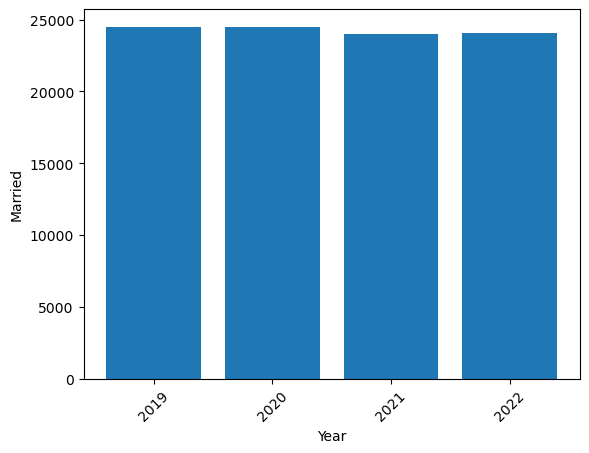

In [91]:
plt.bar(allracesFix["Year"], allracesFix["Married"])
plt.xlabel("Year")
plt.ylabel("Married")
plt.xticks(allracesFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [92]:
allracesFix = allraces.drop('Unnamed: 4', axis=1)
allracesFix.drop(1, inplace=True)
allracesFix.drop(6, inplace=True)

In [93]:
allracesFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
2,2022,26105.0,24040.0,2065.0,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,11008.0,8880.0,2128.0


In [94]:
allracesFix.set_index('Year')
allracesFix["Year"] = allracesFix["Year"].astype(int)
allracesFix["Unmarried"] = allracesFix["Unmarried"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


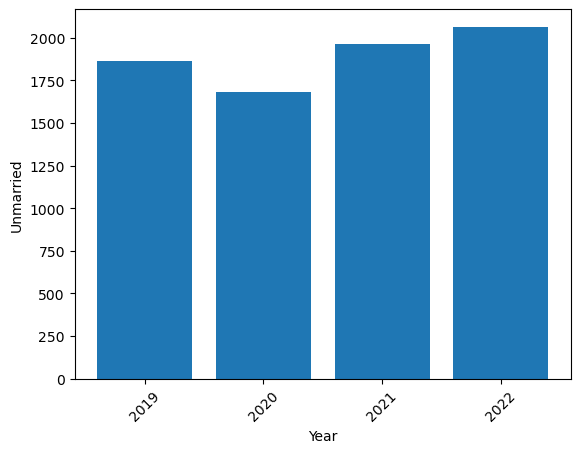

In [95]:
plt.bar(allracesFix["Year"], allracesFix["Unmarried"])
plt.xlabel("Year")
plt.ylabel("Unmarried")
plt.xticks(allracesFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [136]:
whiteDfFix = whiteDf.drop('Unnamed: 4', axis=1)
whiteDfFix.drop(7, inplace=True)
whiteDfFix.drop(13, inplace=True)
whiteDfFix.drop(8, inplace=True)

In [137]:
whiteDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
9,2022,20645.0,19075.0,1569.0,6855.0,5260.0,1596.0
10,2021,20503.0,19060.0,1443.0,7051.0,5381.0,1670.0
11,2020,20712.0,19425.0,1287.0,6901.0,5341.0,1560.0
12,2019,21004.0,19589.0,1415.0,7116.0,5544.0,1572.0


In [138]:
whiteDfFix.set_index('Year')
whiteDfFix["Year"] = whiteDfFix["Year"].astype(int)
whiteDfFix["Married"] = whiteDfFix["Married"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


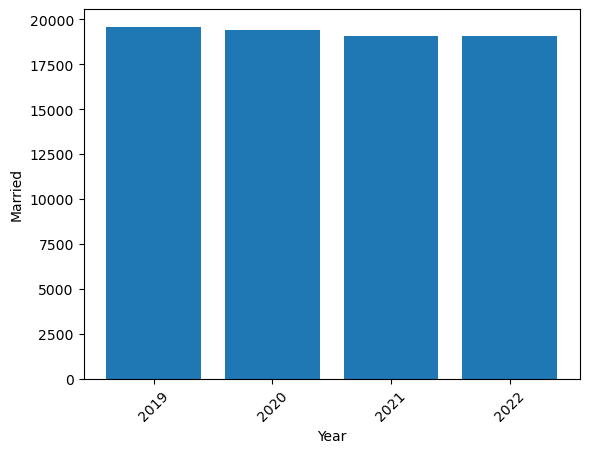

In [139]:
plt.bar(whiteDfFix["Year"], whiteDfFix["Married"])
plt.xlabel("Year")
plt.ylabel("Married")
plt.xticks(whiteDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [140]:
whiteDfFix = whiteDf.drop('Unnamed: 4', axis=1)
whiteDfFix.drop(7, inplace=True)
whiteDfFix.drop(13, inplace=True)
whiteDfFix.drop(8, inplace=True)

In [141]:
whiteDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
9,2022,20645.0,19075.0,1569.0,6855.0,5260.0,1596.0
10,2021,20503.0,19060.0,1443.0,7051.0,5381.0,1670.0
11,2020,20712.0,19425.0,1287.0,6901.0,5341.0,1560.0
12,2019,21004.0,19589.0,1415.0,7116.0,5544.0,1572.0


In [142]:
whiteDfFix.set_index('Year')
whiteDfFix["Year"] = whiteDfFix["Year"].astype(int)
whiteDfFix["Unmarried"] = whiteDfFix["Unmarried"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


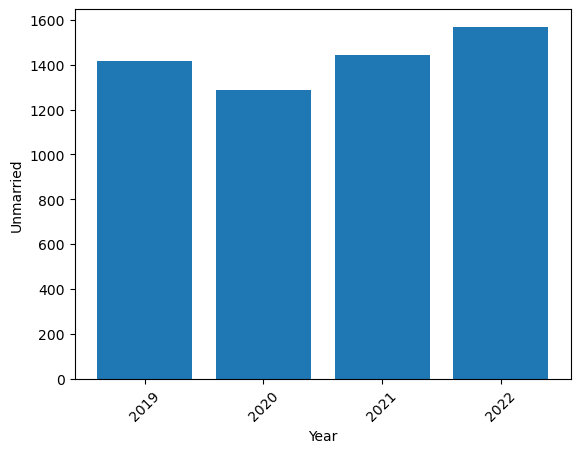

In [143]:
plt.bar(whiteDfFix["Year"], whiteDfFix["Unmarried"])
plt.xlabel("Year")
plt.ylabel("Unmarried")
plt.xticks(whiteDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [170]:
blackDfFix = blackDf.drop('Unnamed: 4', axis=1)
blackDfFix.drop(13, inplace=True)
blackDfFix.drop(14, inplace=True)
blackDfFix.drop(15, inplace=True)
blackDfFix.drop(20, inplace=True)

In [171]:
blackDf

,Year,Total Two parent families,Married,Unmarried,Unnamed: 4,Total One parent families,Mother only,Father only
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2022,2289.0,1952.0,337.0,NaN,3083.0,2661.0,422.0
17,2021,2269.0,1963.0,305.0,NaN,3115.0,2693.0,422.0
18,2020,2263.0,2023.0,239.0,NaN,2976.0,2622.0,354.0
19,2019,2211.0,1934.0,277.0,NaN,2960.0,2581.0,379.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
blackDfFix.set_index('Year')
blackDfFix["Year"] = blackDfFix["Year"].astype(int)
blackDfFix["Married"] = blackDfFix["Married"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


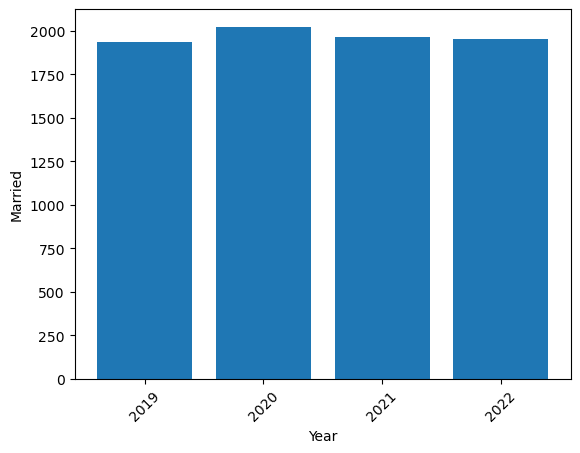

In [173]:
plt.bar(blackDfFix["Year"], blackDfFix["Married"])
plt.xlabel("Year")
plt.ylabel("Married")
plt.xticks(blackDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [174]:
blackDfFix = blackDf.drop('Unnamed: 4', axis=1)
blackDfFix.drop(13, inplace=True)
blackDfFix.drop(14, inplace=True)
blackDfFix.drop(15, inplace=True)
blackDfFix.drop(20, inplace=True)

In [191]:
blackDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
16,2022,2289.0,1952.0,337,3083.0,2661.0,422.0
17,2021,2269.0,1963.0,305,3115.0,2693.0,422.0
18,2020,2263.0,2023.0,239,2976.0,2622.0,354.0
19,2019,2211.0,1934.0,277,2960.0,2581.0,379.0


In [175]:
blackDfFix.set_index('Year')
blackDfFix["Year"] = blackDfFix["Year"].astype(int)
blackDfFix["Unmarried"] = blackDfFix["Unmarried"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


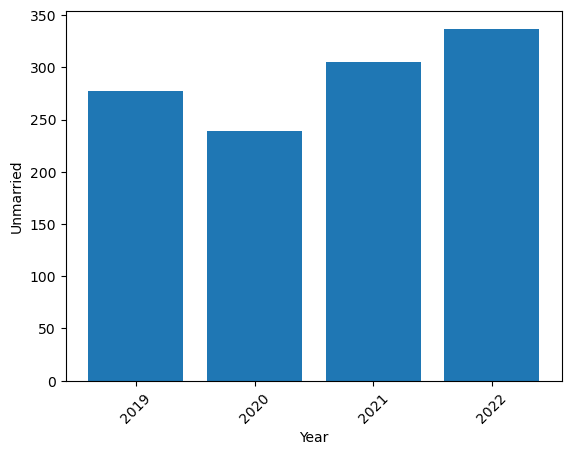

In [176]:
plt.bar(blackDfFix["Year"], blackDfFix["Unmarried"])
plt.xlabel("Year")
plt.ylabel("Unmarried")
plt.xticks(blackDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [197]:
hispanicDfFix = hispanicDf.drop('Unnamed: 4', axis=1)
hispanicDfFix.drop(22, inplace=True)
hispanicDfFix.drop(26, inplace=True)

In [198]:
hispanicDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
23,2022,5544.0,4837.0,707.0,2672.0,2204.0,468.0
24,2021,5510.0,4854.0,656.0,2727.0,2250.0,477.0
25,2020,5401.0,4851.0,550.0,2673.0,2234.0,440.0


In [199]:
hispanicDfFix.set_index('Year')
hispanicDfFix["Year"] = hispanicDfFix["Year"].astype(int)
hispanicDfFix["Married"] = hispanicDfFix["Married"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


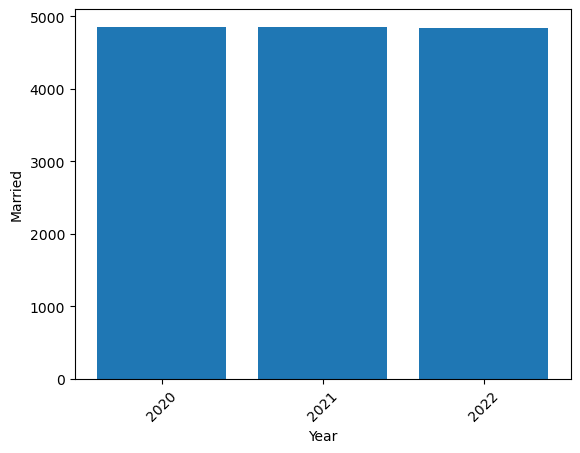

In [200]:
plt.bar(hispanicDfFix["Year"], hispanicDfFix["Married"])
plt.xlabel("Year")
plt.ylabel("Married")
plt.xticks(hispanicDfFix["Year"])
plt.xticks(rotation=45)
plt.show() # 2019 and 2021 were the same rate

In [201]:
hispanicDfFix = hispanicDf.drop('Unnamed: 4', axis=1)
hispanicDfFix.drop(22, inplace=True)
hispanicDfFix.drop(26, inplace=True)

In [202]:
hispanicDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
23,2022,5544.0,4837.0,707.0,2672.0,2204.0,468.0
24,2021,5510.0,4854.0,656.0,2727.0,2250.0,477.0
25,2020,5401.0,4851.0,550.0,2673.0,2234.0,440.0


In [203]:
hispanicDfFix.set_index('Year')
hispanicDfFix["Year"] = hispanicDfFix["Year"].astype(int)
hispanicDfFix["Unmarried"] = hispanicDfFix["Unmarried"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


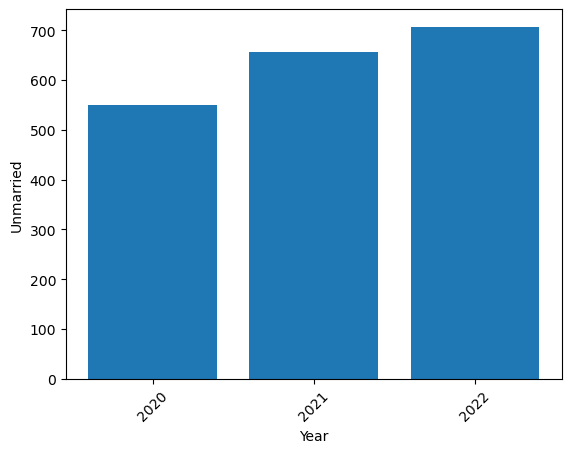

In [204]:
plt.bar(hispanicDfFix["Year"], hispanicDfFix["Unmarried"])
plt.xlabel("Year")
plt.ylabel("Unmarried")
plt.xticks(hispanicDfFix["Year"])
plt.xticks(rotation=45)
plt.show() # 2019 and 2021 there was not much difference

# One parent families - graphs showing mother only vs father only

In [205]:
allracesFix = allraces.drop('Unnamed: 4', axis=1)
allracesFix.drop(1, inplace=True)
allracesFix.drop(6, inplace=True)

In [206]:
allracesFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
2,2022,26105.0,24040.0,2065.0,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,11008.0,8880.0,2128.0


In [207]:
allracesFix.set_index('Year')
allracesFix["Year"] = allracesFix["Year"].astype(int)
allracesFix["Mother only"] = allracesFix["Mother only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


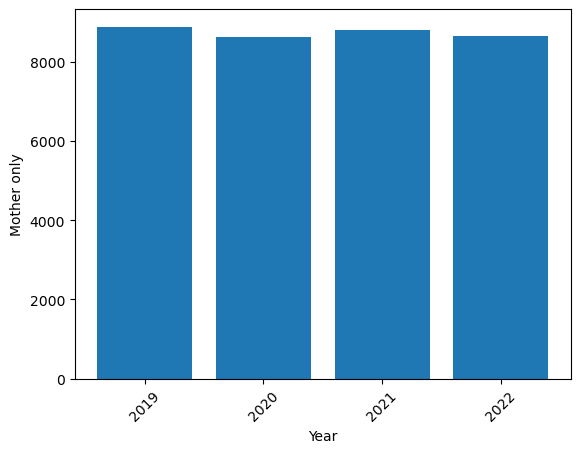

In [208]:
plt.bar(allracesFix["Year"], allracesFix["Mother only"])
plt.xlabel("Year")
plt.ylabel("Mother only")
plt.xticks(allracesFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [209]:
allracesFix = allraces.drop('Unnamed: 4', axis=1)
allracesFix.drop(1, inplace=True)
allracesFix.drop(6, inplace=True)

In [210]:
allracesFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
2,2022,26105.0,24040.0,2065.0,10889.0,8657.0,2232.0
3,2021,25953.0,23992.0,1961.0,11091.0,8797.0,2294.0
4,2020,26161.0,24477.0,1684.0,10720.0,8625.0,2094.0
5,2019,26373.0,24509.0,1864.0,11008.0,8880.0,2128.0


In [211]:
allracesFix.set_index('Year')
allracesFix["Year"] = allracesFix["Year"].astype(int)
allracesFix["Father only"] = allracesFix["Father only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


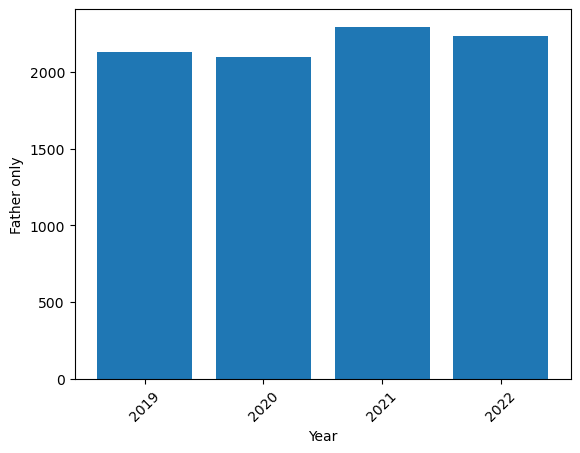

In [212]:
plt.bar(allracesFix["Year"], allracesFix["Father only"])
plt.xlabel("Year")
plt.ylabel("Father only")
plt.xticks(allracesFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [213]:
whiteDfFix = whiteDf.drop('Unnamed: 4', axis=1)
whiteDfFix.drop(7, inplace=True)
whiteDfFix.drop(13, inplace=True)
whiteDfFix.drop(8, inplace=True)

In [214]:
whiteDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
9,2022,20645.0,19075.0,1569.0,6855.0,5260.0,1596.0
10,2021,20503.0,19060.0,1443.0,7051.0,5381.0,1670.0
11,2020,20712.0,19425.0,1287.0,6901.0,5341.0,1560.0
12,2019,21004.0,19589.0,1415.0,7116.0,5544.0,1572.0


In [215]:
whiteDfFix.set_index('Year')
whiteDfFix["Year"] = whiteDfFix["Year"].astype(int)
whiteDfFix["Mother only"] = whiteDfFix["Mother only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


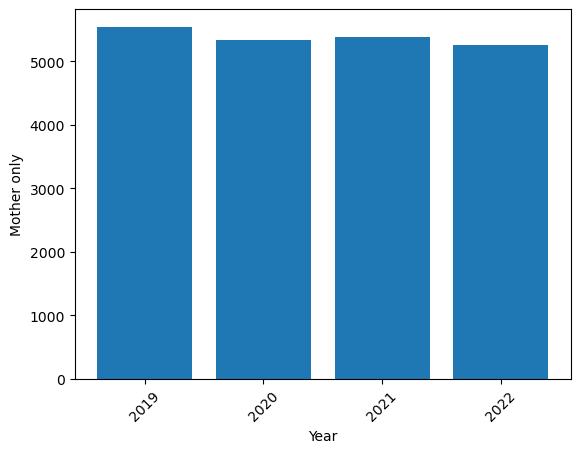

In [216]:
plt.bar(whiteDfFix["Year"], whiteDfFix["Mother only"])
plt.xlabel("Year")
plt.ylabel("Mother only")
plt.xticks(whiteDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [217]:
whiteDfFix = whiteDf.drop('Unnamed: 4', axis=1)
whiteDfFix.drop(7, inplace=True)
whiteDfFix.drop(13, inplace=True)
whiteDfFix.drop(8, inplace=True)

In [218]:
whiteDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
9,2022,20645.0,19075.0,1569.0,6855.0,5260.0,1596.0
10,2021,20503.0,19060.0,1443.0,7051.0,5381.0,1670.0
11,2020,20712.0,19425.0,1287.0,6901.0,5341.0,1560.0
12,2019,21004.0,19589.0,1415.0,7116.0,5544.0,1572.0


In [219]:
whiteDfFix.set_index('Year')
whiteDfFix["Year"] = whiteDfFix["Year"].astype(int)
whiteDfFix["Father only"] = whiteDfFix["Father only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


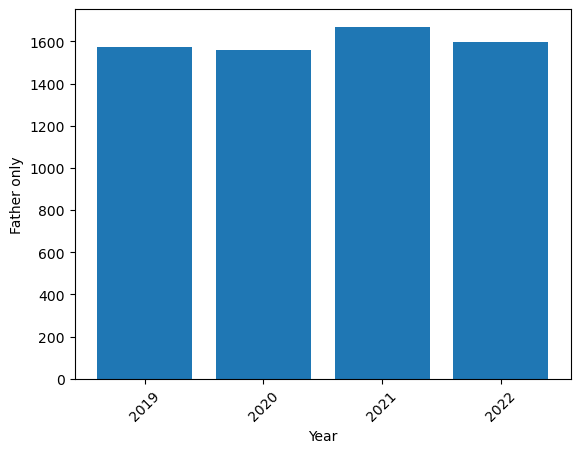

In [220]:
plt.bar(whiteDfFix["Year"], whiteDfFix["Father only"])
plt.xlabel("Year")
plt.ylabel("Father only")
plt.xticks(whiteDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [221]:
blackDfFix = blackDf.drop('Unnamed: 4', axis=1)
blackDfFix.drop(13, inplace=True)
blackDfFix.drop(14, inplace=True)
blackDfFix.drop(15, inplace=True)
blackDfFix.drop(20, inplace=True)

In [ ]:
blackDfFix

In [222]:
blackDfFix.set_index('Year')
blackDfFix["Year"] = blackDfFix["Year"].astype(int)
blackDfFix["Mother only"] = blackDfFix["Mother only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


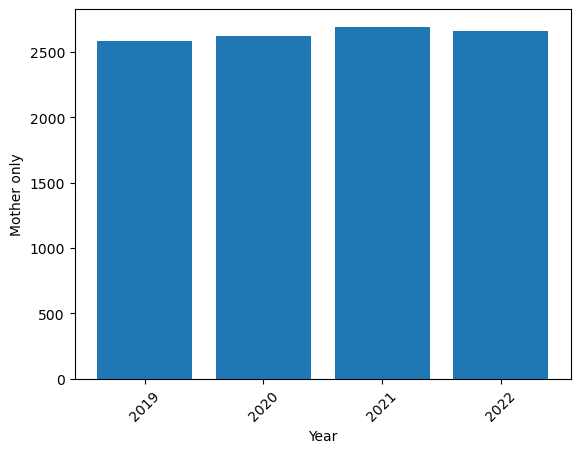

In [223]:
plt.bar(blackDfFix["Year"], blackDfFix["Mother only"])
plt.xlabel("Year")
plt.ylabel("Mother only")
plt.xticks(blackDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [224]:
blackDfFix = blackDf.drop('Unnamed: 4', axis=1)
blackDfFix.drop(13, inplace=True)
blackDfFix.drop(14, inplace=True)
blackDfFix.drop(15, inplace=True)
blackDfFix.drop(20, inplace=True)

In [225]:
blackDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
16,2022,2289.0,1952.0,337.0,3083.0,2661.0,422.0
17,2021,2269.0,1963.0,305.0,3115.0,2693.0,422.0
18,2020,2263.0,2023.0,239.0,2976.0,2622.0,354.0
19,2019,2211.0,1934.0,277.0,2960.0,2581.0,379.0


In [226]:
blackDfFix.set_index('Year')
blackDfFix["Year"] = blackDfFix["Year"].astype(int)
blackDfFix["Father only"] = blackDfFix["Father only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


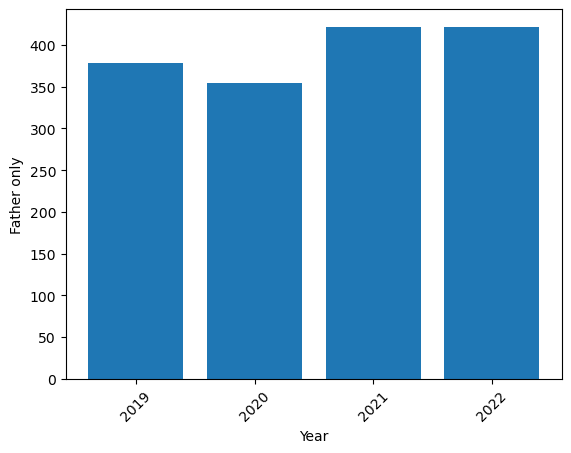

In [227]:
plt.bar(blackDfFix["Year"], blackDfFix["Father only"])
plt.xlabel("Year")
plt.ylabel("Father only")
plt.xticks(blackDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [228]:
hispanicDfFix = hispanicDf.drop('Unnamed: 4', axis=1)
hispanicDfFix.drop(22, inplace=True)
hispanicDfFix.drop(26, inplace=True)

In [229]:
hispanicDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
23,2022,5544.0,4837.0,707.0,2672.0,2204.0,468.0
24,2021,5510.0,4854.0,656.0,2727.0,2250.0,477.0
25,2020,5401.0,4851.0,550.0,2673.0,2234.0,440.0


In [230]:
hispanicDfFix.set_index('Year')
hispanicDfFix["Year"] = hispanicDfFix["Year"].astype(int)
hispanicDfFix["Mother only"] = hispanicDfFix["Mother only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


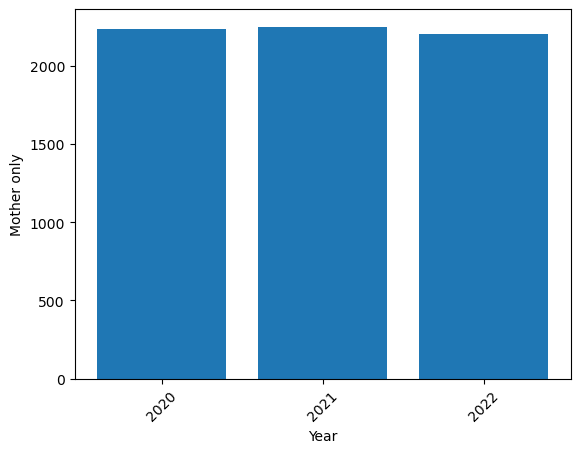

In [231]:
plt.bar(hispanicDfFix["Year"], hispanicDfFix["Mother only"])
plt.xlabel("Year")
plt.ylabel("Mother only")
plt.xticks(hispanicDfFix["Year"])
plt.xticks(rotation=45)
plt.show()

In [232]:
hispanicDfFix = hispanicDf.drop('Unnamed: 4', axis=1)
hispanicDfFix.drop(22, inplace=True)
hispanicDfFix.drop(26, inplace=True)

In [233]:
hispanicDfFix

,Year,Total Two parent families,Married,Unmarried,Total One parent families,Mother only,Father only
23,2022,5544.0,4837.0,707.0,2672.0,2204.0,468.0
24,2021,5510.0,4854.0,656.0,2727.0,2250.0,477.0
25,2020,5401.0,4851.0,550.0,2673.0,2234.0,440.0


In [234]:
hispanicDfFix.set_index('Year')
hispanicDfFix["Year"] = hispanicDfFix["Year"].astype(int)
hispanicDfFix["Father only"] = hispanicDfFix["Father only"].astype(int)

C:\Users\s3dja\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


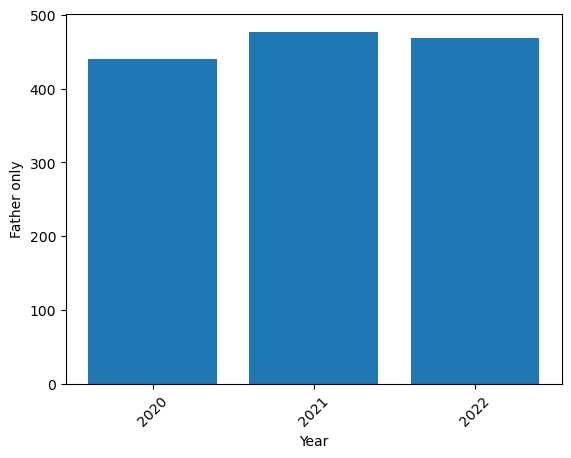

In [235]:
plt.bar(hispanicDfFix["Year"], hispanicDfFix["Father only"])
plt.xlabel("Year")
plt.ylabel("Father only")
plt.xticks(hispanicDfFix["Year"])
plt.xticks(rotation=45)
plt.show()